## Importing Required Libraries

In [1]:
import pandas as pd
%matplotlib inline
pd.set_option('display.max_columns', None)
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame

## Data Loading and Initial Exploration

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

filepath= 'upi_transactions_2024.csv'
upidf = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,"skullagos5246/upi-transactions-2024-dataset",filepath)
upidf

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,TXN0000249996,2024-11-08 22:41:43,Recharge,Food,373,SUCCESS,36-45,26-35,Telangana,ICICI,HDFC,iOS,5G,0,22,Friday,0
249996,TXN0000249997,2024-12-15 02:58:03,P2P,Utilities,2025,SUCCESS,36-45,26-35,Rajasthan,HDFC,Yes Bank,Android,5G,0,2,Sunday,1
249997,TXN0000249998,2024-11-27 16:33:25,P2P,Food,468,SUCCESS,26-35,18-25,West Bengal,ICICI,ICICI,Android,4G,0,16,Wednesday,0
249998,TXN0000249999,2024-01-05 13:31:30,Recharge,Healthcare,284,SUCCESS,18-25,36-45,Andhra Pradesh,Axis,ICICI,iOS,4G,0,13,Friday,0


In [3]:
upidf.timestamp = pd.to_datetime(upidf.timestamp)
upidf['month'] = pd.DatetimeIndex(upidf.timestamp).month
upidf

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,month
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,10
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,4
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,4
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,TXN0000249996,2024-11-08 22:41:43,Recharge,Food,373,SUCCESS,36-45,26-35,Telangana,ICICI,HDFC,iOS,5G,0,22,Friday,0,11
249996,TXN0000249997,2024-12-15 02:58:03,P2P,Utilities,2025,SUCCESS,36-45,26-35,Rajasthan,HDFC,Yes Bank,Android,5G,0,2,Sunday,1,12
249997,TXN0000249998,2024-11-27 16:33:25,P2P,Food,468,SUCCESS,26-35,18-25,West Bengal,ICICI,ICICI,Android,4G,0,16,Wednesday,0,11
249998,TXN0000249999,2024-01-05 13:31:30,Recharge,Healthcare,284,SUCCESS,18-25,36-45,Andhra Pradesh,Axis,ICICI,iOS,4G,0,13,Friday,0,1


## Bank Wise Transactions

In [4]:
import hvplot.pandas

bankmatrix = upidf.groupby(['sender_bank','receiver_bank']).size().reset_index(name='tcount')
bankmatrix = bankmatrix.pivot(index='sender_bank',columns='receiver_bank',values='tcount').fillna(0)
bankmatrix


receiver_bank,Axis,HDFC,ICICI,IndusInd,Kotak,PNB,SBI,Yes Bank
sender_bank,,,,,,,,
Axis,2450,3779,2944,2536,2006,2582,6325,2420
HDFC,3654,5660,4483,3772,3062,3795,9377,3682
ICICI,2918,4472,3609,2891,2391,2950,7410,3128
IndusInd,2512,3890,3048,2414,2017,2468,6267,2557
Kotak,2095,3005,2395,2097,1565,1955,4928,1992
PNB,2498,3752,2979,2634,1988,2467,6212,2416
SBI,6383,9355,7456,6248,5110,6213,15635,6293
Yes Bank,2482,3738,3030,2494,1999,2372,6224,2521


In [5]:
plt.figure(figsize=[12,8])
bankmatrix.hvplot.heatmap(title="Bank wise Transaction Count")

:HeatMap   [columns,index]   (value)

## Spending Distribution Charts and Analysis

In [6]:
import plotly.express as px
import plotly.graph_objs as go

fig_pie = px.treemap(upidf,
                 path=["transaction type","merchant_category"],
                 values="amount (INR)",
                 color='amount (INR)',
                 title='Spending Distribution by Transaction and Merchant'
                 )

fig_file = "figure_1.html"
fig_pie.write_html(fig_file)
IFrame(fig_file, width='100%', height=600)

In [7]:
agematrix = upidf.groupby(['sender_age_group','receiver_age_group'])['amount (INR)'].mean().reset_index(name='tcount')
agematrix = agematrix.pivot(index='sender_age_group',columns='receiver_age_group',values='tcount').fillna(0)
agematrix

receiver_age_group,18-25,26-35,36-45,46-55,56+
sender_age_group,,,,,
18-25,1177.289083,1204.137912,1201.782664,1185.054115,1197.307741
26-35,1327.761776,1318.555754,1339.086467,1324.750431,1313.110629
36-45,1426.755415,1431.253122,1410.364323,1431.244921,1413.339930
46-55,1338.579577,1330.424382,1322.941329,1353.292751,1335.068342
56+,1176.947967,1196.045669,1180.872176,1183.937942,1220.490291


In [8]:
monthwise = upidf.groupby(['hour_of_day','day_of_week'])['amount (INR)'].mean()
monthwise.hvplot.barh(x='hour_of_day',y='amount (INR)',groupby='day_of_week',stacked=True,cmap=['blue','green'],title='Expenditure throughout the Day')

:DynamicMap   [day_of_week]
   :Bars   [hour_of_day]   (amount (INR))

## Frauds in Different Banks

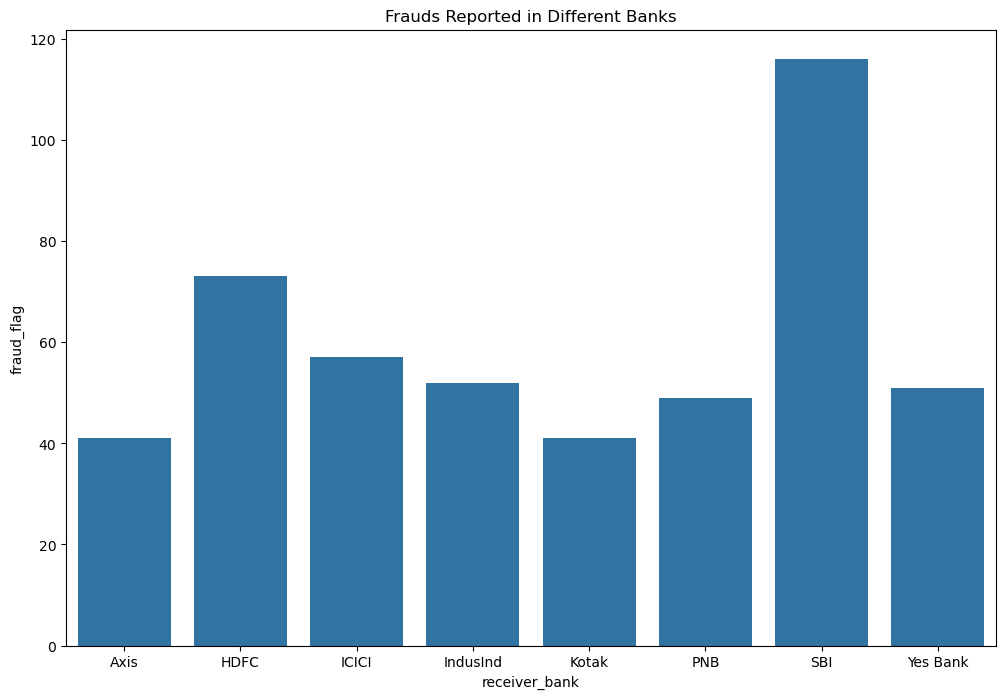

In [9]:
fraudbanks = upidf.where(upidf['fraud_flag']==1).groupby(['receiver_bank'])['fraud_flag'].count()
fraudbanks
sns.barplot(fraudbanks)
plt.title('Frauds Reported in Different Banks')
plt.show()

# Comparing Plots of different libraries:

In [10]:
fraudtime = upidf.where(upidf['fraud_flag']==1).groupby(['day_of_week','hour_of_day'])['fraud_flag'].count().reset_index(name='frauds')
fraudtime.hvplot.heatmap(x='day_of_week',y='hour_of_day',C='frauds',title='Fraud Analysis using hvplot')

:HeatMap   [day_of_week,hour_of_day]   (frauds)

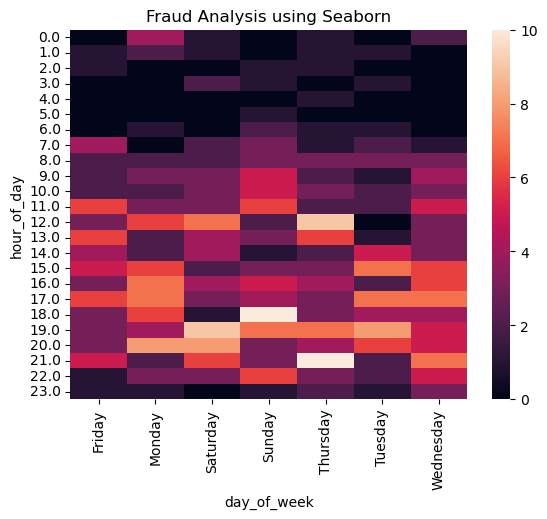

In [11]:
fraudtime = fraudtime.pivot(index='hour_of_day',columns='day_of_week',values='frauds').fillna(0)
sns.heatmap(fraudtime)
plt.title('Fraud Analysis using Seaborn')
plt.show()

In [12]:
fraudly = px.density_heatmap(upidf.where(upidf['fraud_flag']==1),
                             x='day_of_week',
                             y='hour_of_day',
                             title='Fraud Analysis using Plotly'
                             )

fig_file = "figure_2.html"
fraudly.write_html(fig_file)
IFrame(fig_file, width='100%', height=600)

## Failed Transactions

In [13]:
failupi = upidf.where(upidf["transaction_status"]=='FAILED').dropna()
failupi

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,month
60,TXN0000000061,2024-09-11 20:20:53,P2P,Shopping,159.0,FAILED,56+,36-45,Tamil Nadu,SBI,PNB,Android,5G,0.0,20.0,Wednesday,0.0,9.0
67,TXN0000000068,2024-08-14 18:30:01,P2M,Shopping,221.0,FAILED,46-55,26-35,Delhi,HDFC,IndusInd,iOS,5G,0.0,18.0,Wednesday,0.0,8.0
152,TXN0000000153,2024-02-05 08:16:12,P2M,Transport,16.0,FAILED,26-35,26-35,Uttar Pradesh,PNB,PNB,Android,WiFi,0.0,8.0,Monday,0.0,2.0
168,TXN0000000169,2024-07-20 20:07:07,P2M,Food,232.0,FAILED,26-35,26-35,Andhra Pradesh,Axis,SBI,iOS,WiFi,0.0,20.0,Saturday,1.0,7.0
181,TXN0000000182,2024-12-06 15:39:23,P2P,Grocery,2241.0,FAILED,26-35,18-25,Tamil Nadu,SBI,ICICI,Android,5G,0.0,15.0,Friday,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249915,TXN0000249916,2024-04-29 20:59:41,Recharge,Fuel,2178.0,FAILED,26-35,46-55,Telangana,Kotak,ICICI,iOS,5G,0.0,20.0,Monday,0.0,4.0
249918,TXN0000249919,2024-06-10 19:06:11,P2P,Grocery,1155.0,FAILED,36-45,36-45,Maharashtra,SBI,Yes Bank,Android,4G,0.0,19.0,Monday,0.0,6.0
249922,TXN0000249923,2024-06-06 12:22:49,P2P,Healthcare,1243.0,FAILED,26-35,18-25,Telangana,Yes Bank,Kotak,iOS,WiFi,0.0,12.0,Thursday,0.0,6.0
249956,TXN0000249957,2024-11-28 21:59:54,P2P,Transport,634.0,FAILED,46-55,46-55,Andhra Pradesh,IndusInd,ICICI,Android,5G,0.0,21.0,Thursday,0.0,11.0


In [14]:
fig_parallel = px.parallel_categories(
                failupi,
                dimensions=['device_type','network_type','merchant_category'],
                color_continuous_scale='Blues',
                title='Pattern of Failed Transactions'
                )

figfile = "fig3.html"
fig_parallel.write_html(figfile)
IFrame(figfile, width='100%', height=600)